In [1]:
import pandas as pd

file_path = 'karlan_list_2007.dta'
df1 = pd.read_stata(file_path)

print(df1.head())

   treatment  control    ratio  ratio2  ratio3      size  size25  size50  \
0          0        1  Control       0       0   Control       0       0   
1          0        1  Control       0       0   Control       0       0   
2          1        0        1       0       0  $100,000       0       0   
3          1        0        1       0       0  Unstated       0       0   
4          1        0        1       0       0   $50,000       0       1   

   size100  sizeno  ... redcty  bluecty    pwhite    pblack  page18_39  \
0        0       0  ...    0.0      1.0  0.446493  0.527769   0.317591   
1        0       0  ...    1.0      0.0       NaN       NaN        NaN   
2        1       0  ...    0.0      1.0  0.935706  0.011948   0.276128   
3        0       1  ...    1.0      0.0  0.888331  0.010760   0.279412   
4        0       0  ...    0.0      1.0  0.759014  0.127421   0.442389   

   ave_hh_sz  median_hhincome    powner  psch_atlstba  pop_propurban  
0       2.10          28517

EDA and Descriptive Analysis

In [2]:
df1.columns

Index(['treatment', 'control', 'ratio', 'ratio2', 'ratio3', 'size', 'size25',
       'size50', 'size100', 'sizeno', 'ask', 'askd1', 'askd2', 'askd3', 'ask1',
       'ask2', 'ask3', 'amount', 'gave', 'amountchange', 'hpa', 'ltmedmra',
       'freq', 'years', 'year5', 'mrm2', 'dormant', 'female', 'couple',
       'state50one', 'nonlit', 'cases', 'statecnt', 'stateresponse',
       'stateresponset', 'stateresponsec', 'stateresponsetminc', 'perbush',
       'close25', 'red0', 'blue0', 'redcty', 'bluecty', 'pwhite', 'pblack',
       'page18_39', 'ave_hh_sz', 'median_hhincome', 'powner', 'psch_atlstba',
       'pop_propurban'],
      dtype='object')

In [3]:
df1.dtypes

treatment                 int8
control                   int8
ratio                 category
ratio2                    int8
ratio3                    int8
size                  category
size25                    int8
size50                    int8
size100                   int8
sizeno                    int8
ask                   category
askd1                     int8
askd2                     int8
askd3                     int8
ask1                     int16
ask2                     int16
ask3                     int16
amount                 float32
gave                      int8
amountchange           float32
hpa                    float32
ltmedmra                  int8
freq                     int16
years                  float64
year5                     int8
mrm2                   float64
dormant                   int8
female                 float64
couple                 float64
state50one                int8
nonlit                 float64
cases                  float64
statecnt

In [4]:
column_means = df1.mean(numeric_only=True)
print("Means of each column:")
print(column_means)

Means of each column:
treatment                 0.666813
control                   0.333187
ratio2                    0.222311
ratio3                    0.222211
size25                    0.166723
size50                    0.166623
size100                   0.166723
sizeno                    0.166743
askd1                     0.222311
askd2                     0.222291
askd3                     0.222211
ask1                     71.501807
ask2                     91.792724
ask3                    111.046263
amount                    0.915694
gave                      0.020646
amountchange            -52.672016
hpa                      59.384975
ltmedmra                  0.493720
freq                      8.039355
years                     6.097540
year5                     0.508815
mrm2                     13.007268
dormant                   0.523471
female                    0.277669
couple                    0.091897
state50one                0.000998
nonlit                    2.47391

In [5]:
# Check for missing values
missing_values = df1.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
treatment                0
control                  0
ratio                    0
ratio2                   0
ratio3                   0
size                     0
size25                   0
size50                   0
size100                  0
sizeno                   0
ask                      0
askd1                    0
askd2                    0
askd3                    0
ask1                     0
ask2                     0
ask3                     0
amount                   0
gave                     0
amountchange             0
hpa                      0
ltmedmra                 0
freq                     0
years                    1
year5                    0
mrm2                     1
dormant                  0
female                1111
couple                1148
state50one               0
nonlit                 452
cases                  452
statecnt                 0
stateresponse            0
stateresponset           0
stateresponsec          

In [6]:
df1['gender'] = df1['female'].apply(lambda x: 'F' if x == 1 else 'M')

In [7]:
df = df1.copy()

categorical_vars = [
    'ratio', 'ratio2', 'ratio3',
    'size', 'size25', 'size50', 'size100', 'sizeno',
    'askd1', 'askd2', 'askd3',
    'ltmedmra', 'year5', 'dormant',
    'female', 'couple', 'state50one', 
    'close25', 'red0', 'blue0', 'redcty', 'bluecty'
]

# Convert to categorical
df[categorical_vars] = df[categorical_vars].astype('category')

df.describe()

,treatment,control,ask1,ask2,ask3,amount,gave,amountchange,hpa,freq,...,stateresponsetminc,perbush,pwhite,pblack,page18_39,ave_hh_sz,median_hhincome,powner,psch_atlstba,pop_propurban
count,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,50083.000000,...,50080.000000,50048.000000,48217.000000,48047.000000,48217.000000,48221.000000,48209.000000,48214.000000,48215.000000,48217.000000
mean,0.666813,0.333187,71.501807,91.792724,111.046263,0.915694,0.020646,-52.672016,59.384975,8.039355,...,0.004273,0.487940,0.819599,0.086710,0.321694,2.429012,54815.700533,0.669418,0.391661,0.871968
std,0.471357,0.471357,101.728936,127.252628,151.673562,8.707393,0.142197,1267.097656,71.179871,11.394454,...,0.009112,0.078733,0.168560,0.135868,0.103039,0.378105,22027.316665,0.193405,0.186599,0.258633
min,0.000000,0.000000,25.000000,35.000000,50.000000,0.000000,0.000000,-200412.125000,0.000000,0.000000,...,-0.047619,0.090909,0.009418,0.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35.000000,45.000000,55.000000,0.000000,0.000000,-50.000000,30.000000,2.000000,...,-0.001388,0.444444,0.755845,0.014729,0.258311,2.210000,39181.000000,0.560222,0.235647,0.884929
50%,1.000000,0.000000,45.000000,60.000000,70.000000,0.000000,0.000000,-30.000000,45.000000,4.000000,...,0.001779,0.484848,0.872797,0.036554,0.305534,2.440000,50673.000000,0.712296,0.373744,1.000000
75%,1.000000,1.000000,65.000000,85.000000,100.000000,0.000000,0.000000,-25.000000,60.000000,10.000000,...,0.010545,0.525253,0.938827,0.090882,0.369132,2.660000,66005.000000,0.816798,0.530036,1.000000
max,1.000000,1.000000,1500.000000,1875.000000,2250.000000,400.000000,1.000000,275.000000,1000.000000,218.000000,...,0.111111,0.731959,1.000000,0.989622,0.997544,5.270000,200001.000000,1.000000,1.000000,1.000000


In [8]:
datadesc = df.describe()
%pip install tabulate

print(datadesc.to_markdown(index=False))


Note: you may need to restart the kernel to use updated packages.
|    treatment |      control |       ask1 |       ask2 |      ask3 |       amount |          gave |   amountchange |        hpa |        freq |       years |       mrm2 |      nonlit |       cases |       statecnt |   stateresponse |   stateresponset |   stateresponsec |   stateresponsetminc |       perbush |         pwhite |        pblack |    page18_39 |    ave_hh_sz |   median_hhincome |       powner |   psch_atlstba |   pop_propurban |
|-------------:|-------------:|-----------:|-----------:|----------:|-------------:|--------------:|---------------:|-----------:|------------:|------------:|-----------:|------------:|------------:|---------------:|----------------:|-----------------:|-----------------:|---------------------:|--------------:|---------------:|--------------:|-------------:|-------------:|------------------:|-------------:|---------------:|----------------:|
| 50083        | 50083        | 50083      |

In [9]:
# Generate markdown table to insert into Quarto document
markdown_table = datadesc.to_markdown(index=False)

with open("index.qmd", "r") as f:
    qmd_text = f.read()

qmd_text = qmd_text.replace("<!-- INSERT_DESC_HERE -->", markdown_table)

with open("index.qmd", "w") as f:
    f.write(qmd_text)


In [10]:
# Replace 'give' with the correct column name, e.g., 'gave', which exists in the dfframe
dfg = df[df['gave'] == 1]

In [11]:
percentage_gave = (df['gave'].astype(int).sum() / len(df)) * 100
print(f"Percentage of rows where gave = 1: {percentage_gave:.2f}%")

Percentage of rows where gave = 1: 2.06%


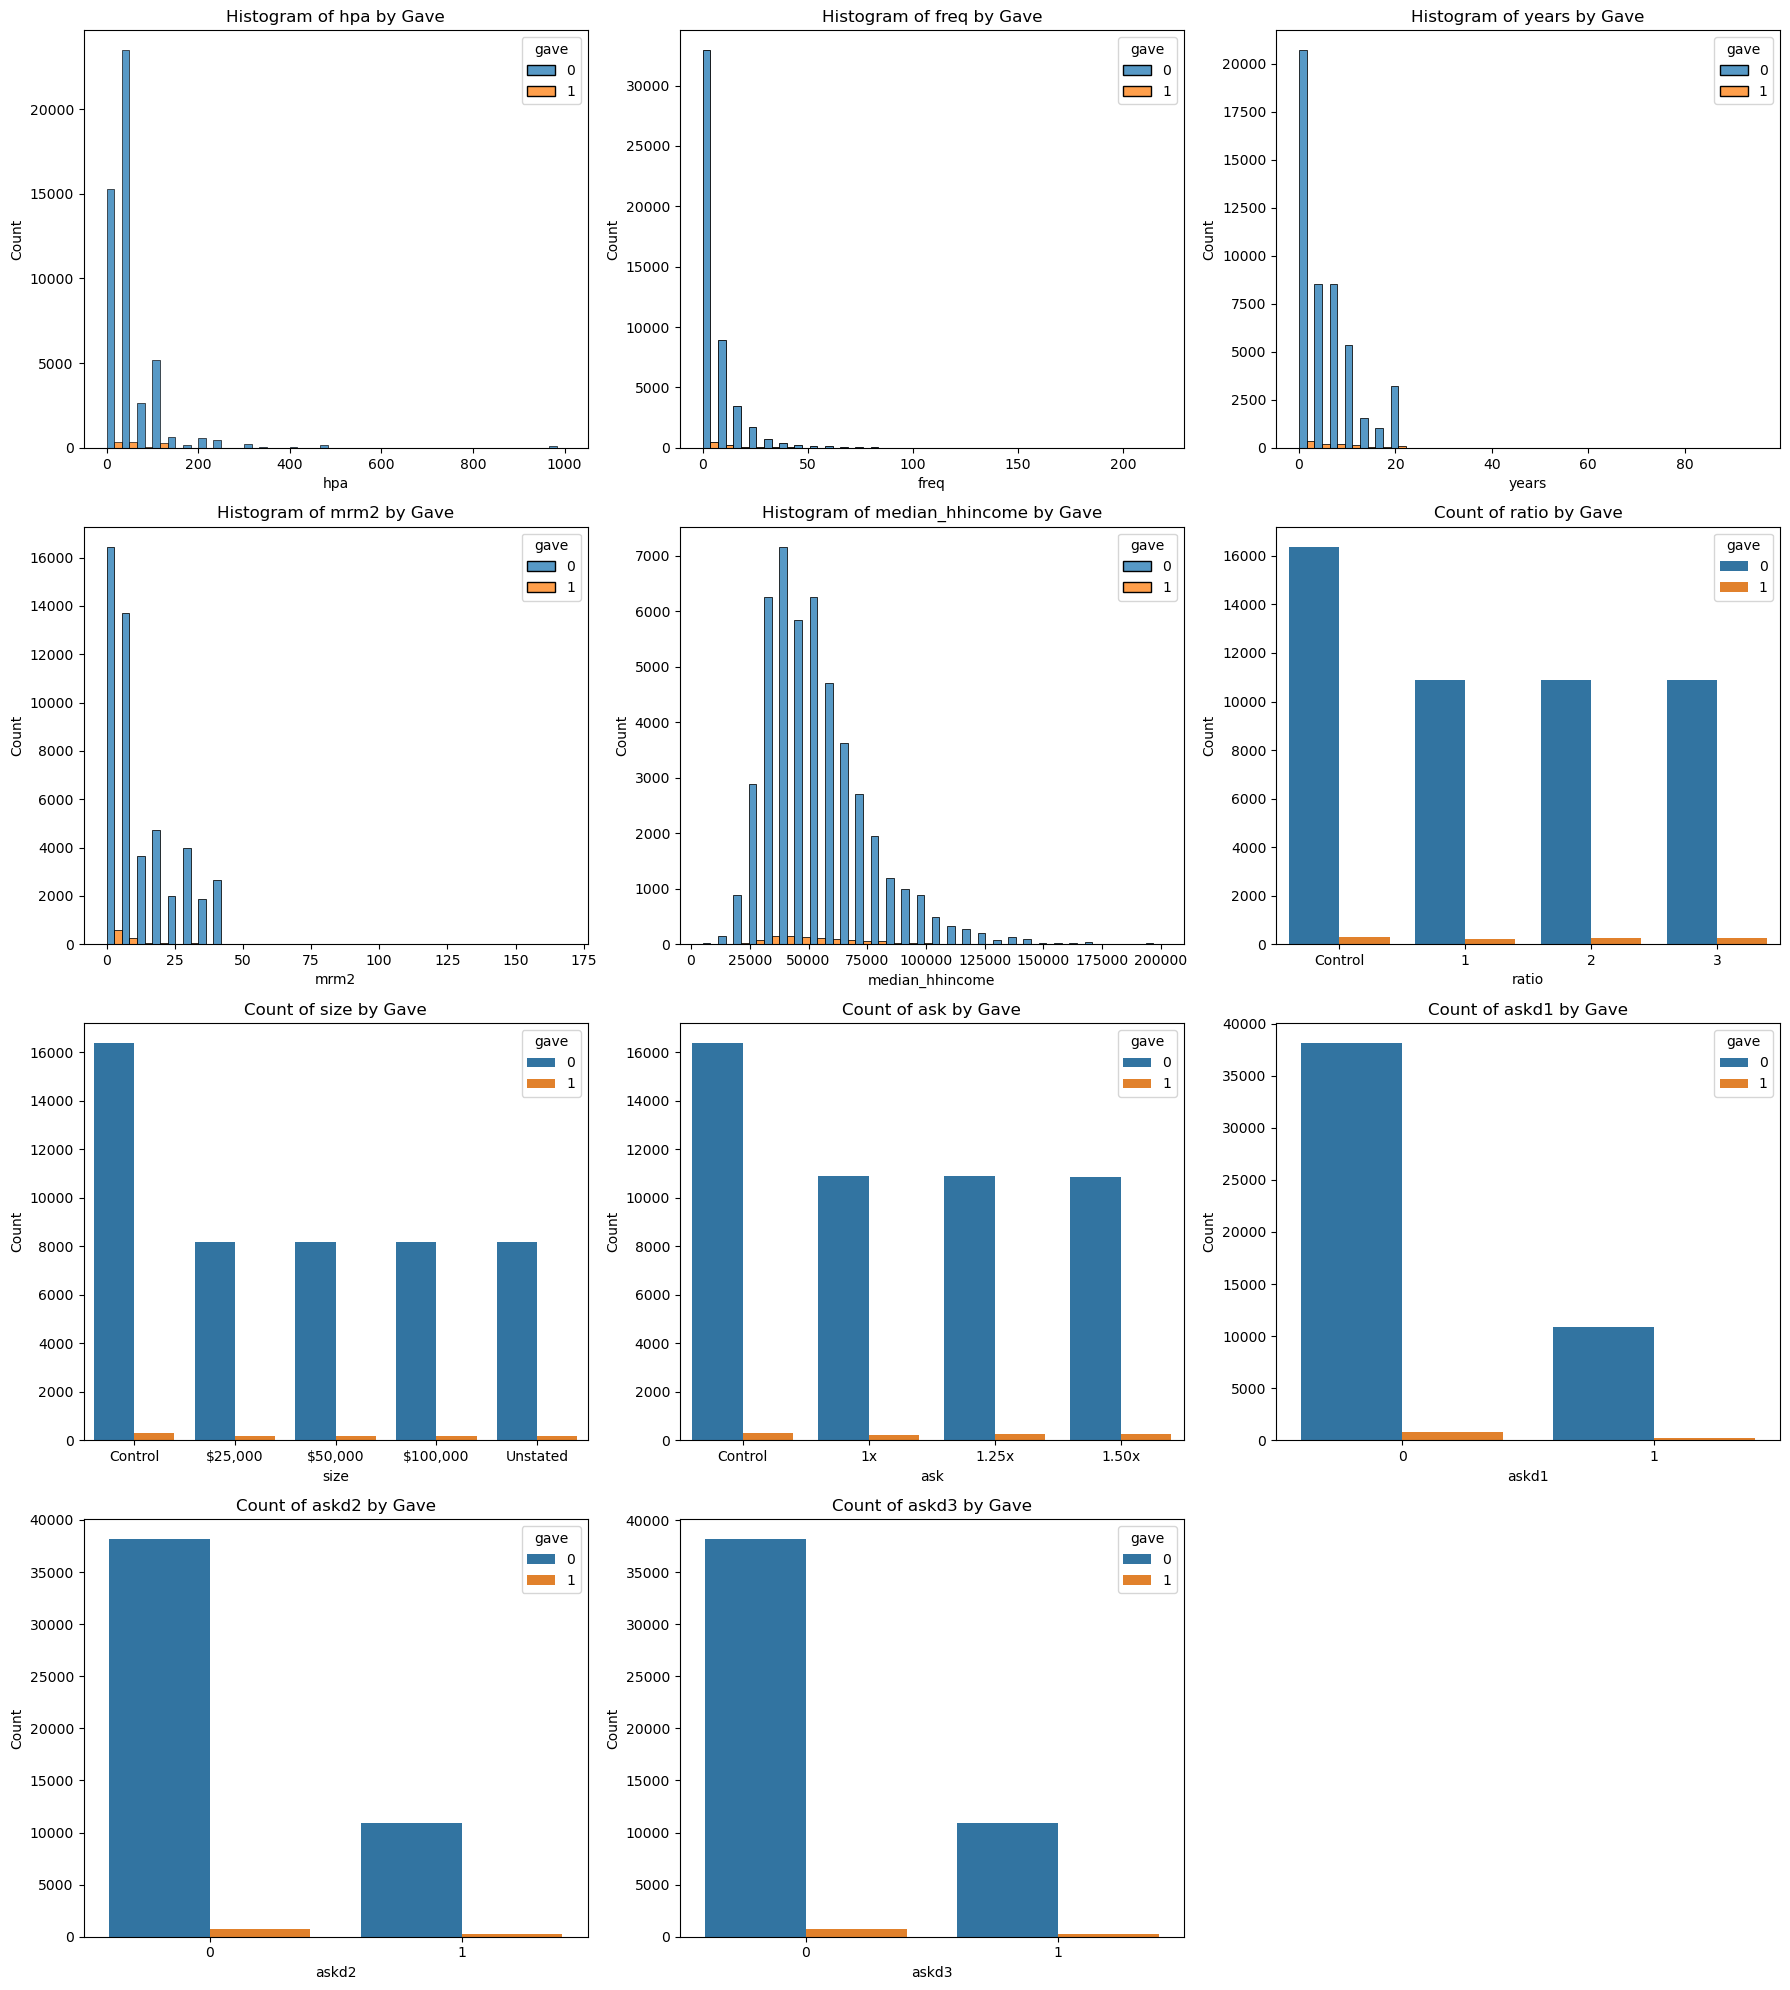

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Key variables and experimental treatment variables to explore
variables_to_plot = ['hpa', 'freq', 'years', 'mrm2', 'median_hhincome', 
                     'ratio', 'size', 'ask', 'askd1', 'askd2', 'askd3', ]

import math



# Set up the figure layout
num_vars = len(variables_to_plot)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)

plt.figure(figsize=(18, 5 * num_rows))

for idx, var in enumerate(variables_to_plot, 1):
    plt.subplot(num_rows, num_cols, idx)
    if df[var].dtype in ['int64', 'float64', 'float32', 'int16', 'int8']:
        sns.histplot(data=df, x=var, hue='gave', multiple='dodge', bins=30)
        plt.title(f'Histogram of {var} by Gave')
    else:
        sns.countplot(data=df, x=var, hue='gave')
        plt.title(f'Count of {var} by Gave')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()



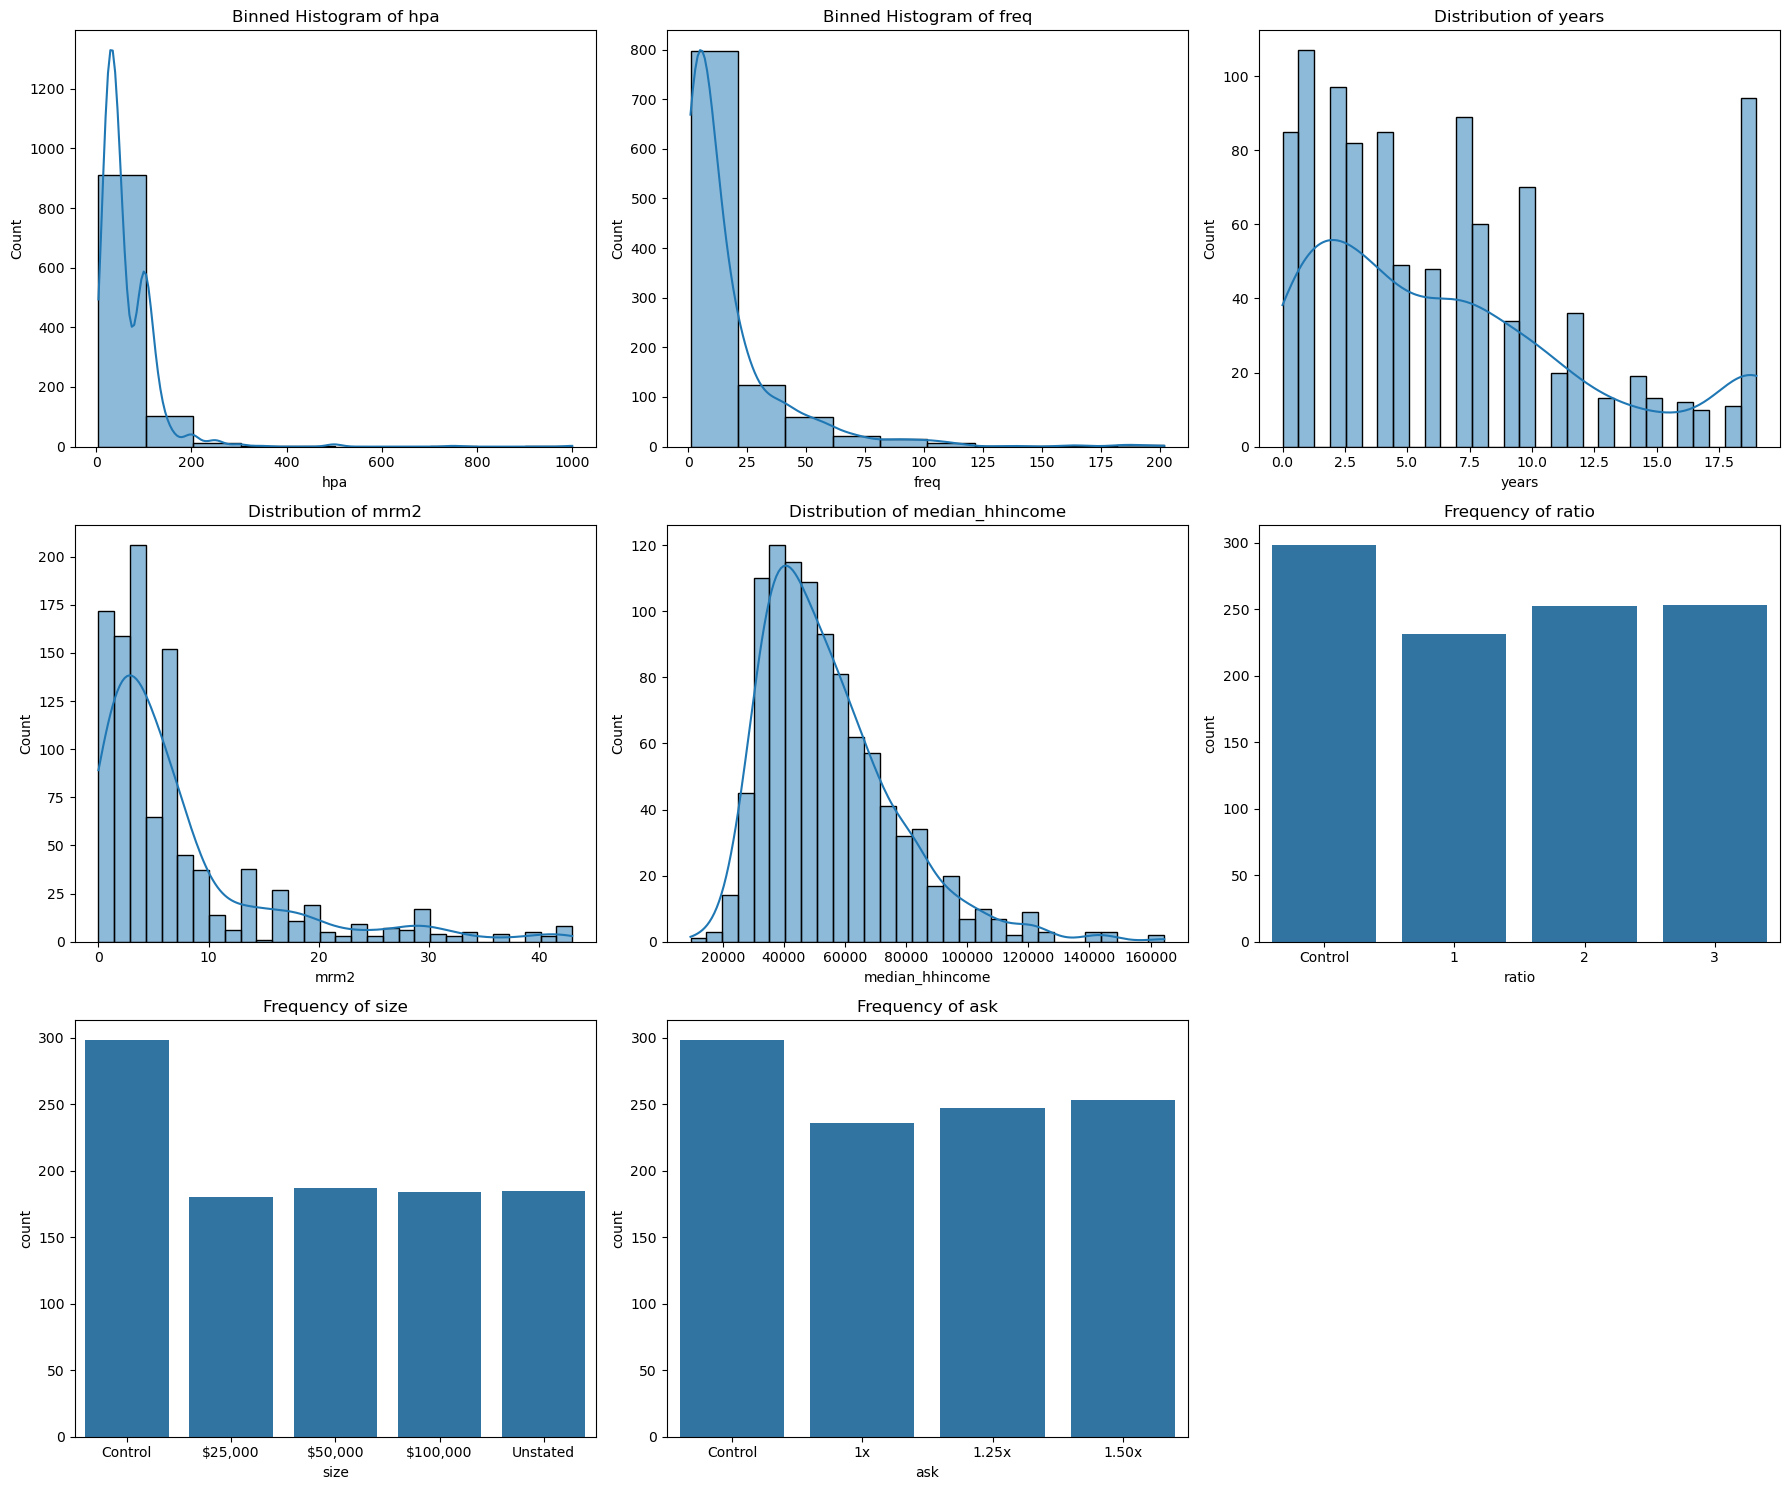

In [13]:
# Key variables and experimental treatment variables to explore
variables_to_plot = ['hpa', 'freq', 'years', 'mrm2', 'median_hhincome', 
                     'ratio', 'size', 'ask']

# Set up the figure layout
num_vars = len(variables_to_plot)
num_cols = 3
num_rows = -(-num_vars // num_cols)  # Ceiling division

plt.figure(figsize=(18, 5 * num_rows))

# Plot distribution of donation amount against each variable
for idx, var in enumerate(variables_to_plot, 1):
    plt.subplot(num_rows, num_cols, idx)
    if var in ['freq', 'hpa']:
        sns.histplot(data=dfg, x=var, bins=10, kde=True)
        plt.title(f'Binned Histogram of {var}')
    elif dfg[var].dtype in ['int64', 'float64']:
        sns.histplot(data=dfg, x=var, bins=30, kde=True)
        plt.title(f'Distribution of {var}')
    else:
        sns.countplot(data=dfg, x=var)
        plt.title(f'Frequency of {var}')
    plt.tight_layout()

plt.show()


In [14]:
dfg[['ltmedmra', 'year5', 'dormant','red0']] = dfg[['ltmedmra', 'year5', 'dormant','red0']].astype('category')

/tmp/ipykernel_5207/3543977266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg[['ltmedmra', 'year5', 'dormant','red0']] = dfg[['ltmedmra', 'year5', 'dormant','red0']].astype('category')


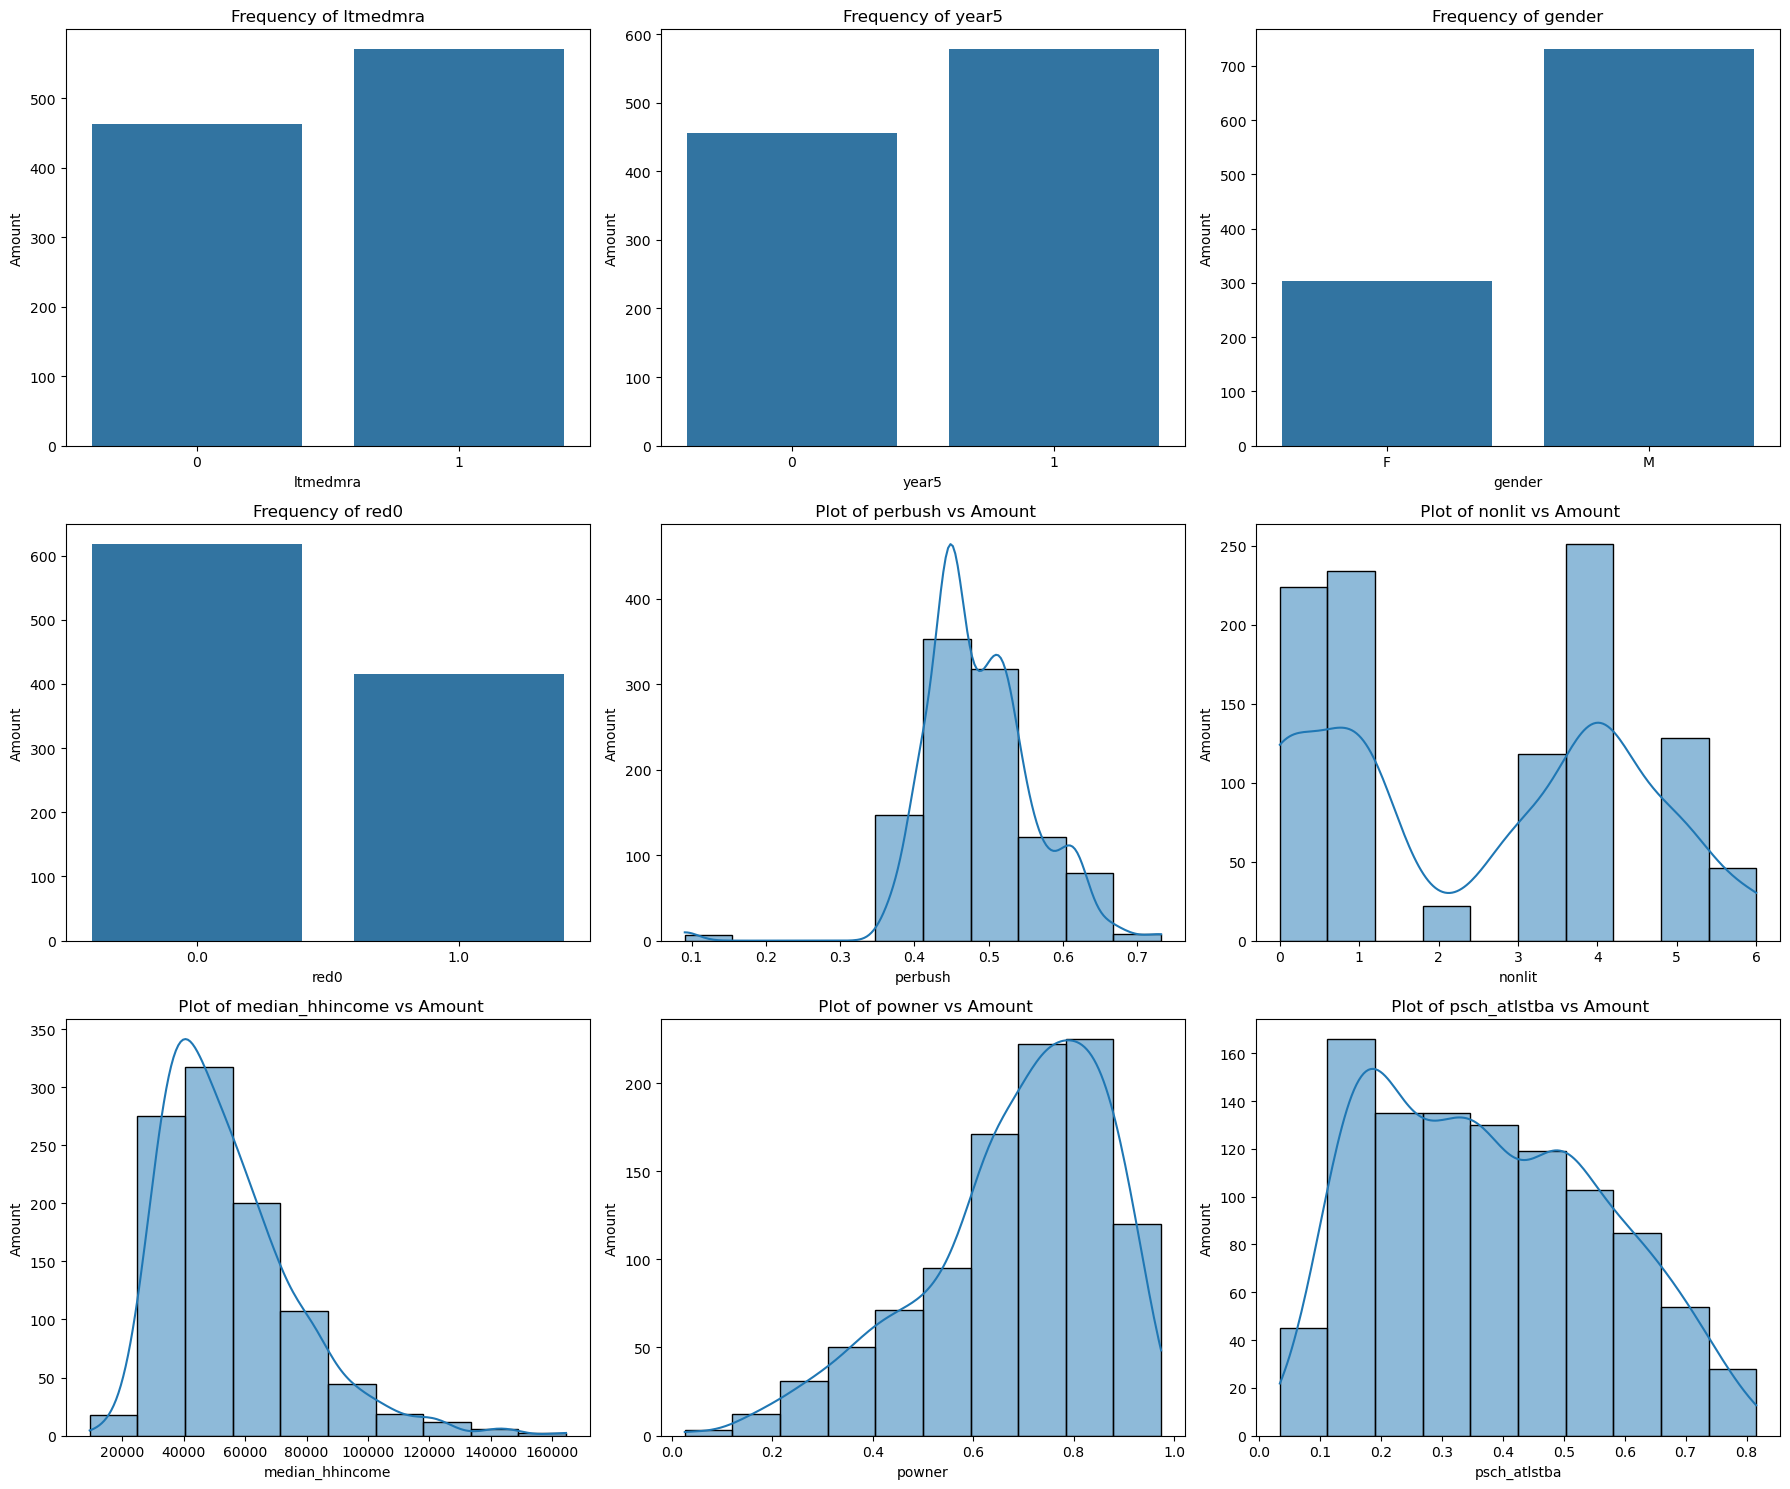

In [15]:
donor_characteristics = ['ltmedmra', 'year5', 'gender']
geo_political_context = ['red0', 'perbush', 'nonlit']
zip_code_demographics = ['median_hhincome', 'powner', 'psch_atlstba']

# Combine into one list if needed
selected_vars = donor_characteristics + geo_political_context + zip_code_demographics

num_vars = len(variables_to_plot)
num_cols = 3
num_rows = -(-num_vars // num_cols)  # Ceiling division

plt.figure(figsize=(18, 5 * num_rows))

# Plot distribution or frequency plots for selected_vars against 'amount'
for idx, var in enumerate(selected_vars, 1):
    plt.subplot(num_rows, num_cols, idx)
    if df[var].dtype in ['int64', 'float64', 'float32', 'int16', 'int8']:
        sns.histplot(data=dfg, x=var, bins=10, kde=True)
        plt.title(f' Plot of {var} vs Amount')
    else:
        sns.countplot(data=dfg, x=var)
        plt.title(f'Frequency of {var}')
    plt.xlabel(var)
    plt.ylabel('Amount')
    plt.tight_layout()

plt.show()

|Variable             | Description                                                         |
|----------------------|---------------------------------------------------------------------|
| `treatment`          | Treatment                                                           |
| `control`            | Control                                                             |
| `ratio`              | Match ratio                                                         |
| `ratio2`             | 2:1 match ratio                                                     |
| `ratio3`             | 3:1 match ratio                                                     |
| `size`               | Match threshold                                                     |
| `size25`             | \$25,000 match threshold                                            |
| `size50`             | \$50,000 match threshold                                            |
| `size100`            | \$100,000 match threshold                                           |
| `sizeno`             | Unstated match threshold                                            |
| `ask`                | Suggested donation amount                                           |
| `askd1`              | Suggested donation was highest previous contribution                |
| `askd2`              | Suggested donation was 1.25 x highest previous contribution         |
| `askd3`              | Suggested donation was 1.50 x highest previous contribution         |
| `ask1`               | Highest previous contribution (for suggestion)                      |
| `ask2`               | 1.25 x highest previous contribution (for suggestion)               |
| `ask3`               | 1.50 x highest previous contribution (for suggestion)               |
| `amount`             | Dollars given                                                       |
| `gave`               | Gave anything                                                       |
| `amountchange`       | Change in amount given                                              |
| `hpa`                | Highest previous contribution                                       |
| `ltmedmra`           | Small prior donor: last gift was less than median \$35              |
| `freq`               | Number of prior donations                                           |
| `years`              | Number of years since initial donation                              |
| `year5`              | At least 5 years since initial donation                             |
| `mrm2`               | Number of months since last donation                                |
| `dormant`            | Already donated in 2005                                             |
| `female`             | Female                                                              |
| `couple`             | Couple                                                              |
| `state50one`         | State tag: 1 for one observation of each of 50 states; 0 otherwise  |
| `nonlit`             | Nonlitigation                                                       |
| `cases`              | Court cases from state in 2004-5 in which organization was involved |
| `statecnt`           | Percent of sample from state                                        |
| `stateresponse`      | Proportion of sample from the state who gave                        |
| `stateresponset`     | Proportion of treated sample from the state who gave                |
| `stateresponsec`     | Proportion of control sample from the state who gave                |
| `stateresponsetminc` | stateresponset - stateresponsec                                     |
| `perbush`            | State vote share for Bush                                           |
| `close25`            | State vote share for Bush between 47.5% and 52.5%                   |
| `red0`               | Red state                                                           |
| `blue0`              | Blue state                                                          |
| `redcty`             | Red county                                                          |
| `bluecty`            | Blue county                                                         |
| `pwhite`             | Proportion white within zip code                                    |
| `pblack`             | Proportion black within zip code                                    |
| `page18_39`          | Proportion age 18-39 within zip code                                |
| `ave_hh_sz`          | Average household size within zip code                              |
| `median_hhincome`    | Median household income within zip code                             |
| `powner`             | Proportion house owner within zip code                              |
| `psch_atlstba`       | Proportion who finished college within zip code                     |
| `pop_propurban`      | Proportion of population urban within zip code                      |

## Hypothesis tests to confirm if non-outcome variables are not significantly different in control and treatment groups
at 95% confidence level


In [16]:
df.columns

Index(['treatment', 'control', 'ratio', 'ratio2', 'ratio3', 'size', 'size25',
       'size50', 'size100', 'sizeno', 'ask', 'askd1', 'askd2', 'askd3', 'ask1',
       'ask2', 'ask3', 'amount', 'gave', 'amountchange', 'hpa', 'ltmedmra',
       'freq', 'years', 'year5', 'mrm2', 'dormant', 'female', 'couple',
       'state50one', 'nonlit', 'cases', 'statecnt', 'stateresponse',
       'stateresponset', 'stateresponsec', 'stateresponsetminc', 'perbush',
       'close25', 'red0', 'blue0', 'redcty', 'bluecty', 'pwhite', 'pblack',
       'page18_39', 'ave_hh_sz', 'median_hhincome', 'powner', 'psch_atlstba',
       'pop_propurban', 'gender'],
      dtype='object')

MRM2: Months since last donation


In [17]:
treatment_group_mrm2 = df[df['treatment'] == 1]['mrm2'].dropna()
control_group_mrm2 = df[df['control'] == 1]['mrm2'].dropna()

# Calculate t-statistic
mean_diff = treatment_group_mrm2.mean() - control_group_mrm2.mean()
var_treatment = treatment_group_mrm2.var(ddof=1)
var_control = control_group_mrm2.var(ddof=1)
n_treatment = len(treatment_group_mrm2)
n_control = len(control_group_mrm2)

pooled_se = ((var_treatment / n_treatment) + (var_control / n_control)) ** 0.5
manual_t_stat = mean_diff / pooled_se

print(f"Manual T-statistic: {manual_t_stat:.4f}")

from scipy.stats import t

# Degrees of freedom
df_degrees = n_treatment + n_control - 2

# Critical value for 95% confidence level (two-tailed test)
critical_value = t.ppf(1 - 0.025, df_degrees)

print(f"Critical value (95% confidence level): {critical_value:.4f}")

# Compare manual_t_stat against critical value
if abs(manual_t_stat) > critical_value:
    print("Reject the null hypothesis: There is a statistically significant difference in mrm2 between treatment and control groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in mrm2 between treatment and control groups.")

Manual T-statistic: 0.1195
Critical value (95% confidence level): 1.9600
Fail to reject the null hypothesis: There is no statistically significant difference in mrm2 between treatment and control groups.


In [18]:
#crosss check with scipy stats
from scipy.stats import ttest_ind
from scipy.stats import t

t_stat, p_value = ttest_ind(treatment_group_mrm2, control_group_mrm2, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Check significance at 95% confidence level
if p_value < 0.05:
    print("The difference in mrm2 between treatment and control groups is statistically significant.")
else:
    print("The difference in mrm2 between treatment and control groups is not statistically significant.")

T-statistic: 0.1195
P-value: 0.9049
The difference in mrm2 between treatment and control groups is not statistically significant.


Confirm with linear regression:

Model: mrm2 = β0 + β1 * treatment + ε

The coefficient β1 tells you the mean difference between treatment and control.
The p-value on β1 tells you if this difference is statistically significant.
Epsilon is the error term, which captures all other factors that might affect mrm2.

In [19]:
#using linear regression to confirm


import statsmodels.api as sm

X = df['treatment']  # Independent variable
y = df['mrm2']       # Dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

print(f"T-value for treatment: {model.tvalues['treatment']:.4f}")
print(f"P-value for treatment: {model.pvalues['treatment']:.4f}")

p_valuem = model.pvalues['treatment']
t_valuem = model.tvalues['treatment']

# Check the p-value of the treatment coefficient
if model.pvalues['treatment'] < 0.05:
    print("The treatment effect on mrm2 is statistically significant.")
else:
    print("The treatment effect on mrm2 is not statistically significant.")


                            OLS Regression Results                            
Dep. Variable:                   mrm2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01428
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.905
Time:                        19:24:38   Log-Likelihood:            -1.9585e+05
No. Observations:               50082   AIC:                         3.917e+05
Df Residuals:                   50080   BIC:                         3.917e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9981      0.094    138.979      0.0

Perform hypothesis tests on other variable, picking few from each "bucket" of variables.

donor_characteristics = ['ltmedmra', 'year5', 'gender'] \
geo_political_context = ['red0', 'perbush', 'nonlit'] \
zip_code_demographics = ['median_hhincome', 'powner', 'psch_atlstba']

In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import t


donor_characteristics = ['freq', 'year5', 'female','mrm2']  
geo_political_context = ['red0', 'perbush', 'nonlit']
zip_code_demographics = ['median_hhincome', 'powner', 'psch_atlstba']

all_vars = donor_characteristics + geo_political_context + zip_code_demographics

# Set significance level
alpha = 0.05

# Store results
results = []



for v in all_vars:
    # Drop missing data
    treatment = df[df['treatment'] == 1][v].dropna()
    control = df[df['control'] == 1][v].dropna()

    # Convert categorical variables to numeric if necessary
    if treatment.dtype.name == 'category':
        treatment = treatment.astype(int)
    if control.dtype.name == 'category':
        control = control.astype(int)

    # Manual t-test
    mean_diff = treatment.mean() - control.mean()
    var_treatment = treatment.var(ddof=1)
    var_control = control.var(ddof=1)
    n_treatment = len(treatment)
    n_control = len(control)

    pooled_se = ((var_treatment / n_treatment) + (var_control / n_control))**0.5
    manual_t_stat = mean_diff / pooled_se
    df_degrees = n_treatment + n_control - 2
    critical_value = t.ppf(1 - alpha/2, df_degrees)
    manual_conclusion = "Significant" if abs(manual_t_stat) > critical_value else "Not Significant"
    
    # Regression
    X = df['treatment']
    y = df[v]
    X = sm.add_constant(X)

    model = sm.OLS(y, X, missing='drop').fit(cov_type='HC1')


    reg_t_stat = round(model.tvalues['treatment'], 4)
    reg_p_value = round(model.pvalues['treatment'], 4)
    reg_conclusion = "Significant" if reg_p_value < alpha else "Not Significant"
    

    # Store the results
    results.append({
        "Variable": v,
        "Manual T-Stat": round(manual_t_stat, 4),
        "Critical Value": round(critical_value, 4),
        "Manual Test Conclusion": manual_conclusion,
        "Regression T-Stat": reg_t_stat,
        "Regression P-Value": reg_p_value,
        "Regression Conclusion": reg_conclusion
    })

results_df = pd.DataFrame(results)

results_df


,Variable,Manual T-Stat,Critical Value,Manual Test Conclusion,Regression T-Stat,Regression P-Value,Regression Conclusion
0,freq,-0.1108,1.96,Not Significant,-0.1108,0.9117,Not Significant
1,year5,-1.5627,1.96,Not Significant,-1.5627,0.1181,Not Significant
2,female,-1.7535,1.96,Not Significant,-1.7535,0.0795,Not Significant
3,mrm2,0.1195,1.96,Not Significant,0.1195,0.9049,Not Significant
4,red0,1.8773,1.96,Not Significant,1.8773,0.0605,Not Significant
5,perbush,2.7463,1.96,Significant,2.7463,0.0060,Significant
6,nonlit,1.7052,1.96,Not Significant,1.7052,0.0882,Not Significant
7,median_hhincome,-0.7433,1.96,Not Significant,-0.7433,0.4573,Not Significant
8,powner,0.1895,1.96,Not Significant,0.1894,0.8498,Not Significant
9,psch_atlstba,-1.8427,1.96,Not Significant,-1.8427,0.0654,Not Significant


In [21]:
print(results_df.to_markdown(index=False))


| Variable        |   Manual T-Stat |   Critical Value | Manual Test Conclusion   |   Regression T-Stat |   Regression P-Value | Regression Conclusion   |
|:----------------|----------------:|-----------------:|:-------------------------|--------------------:|---------------------:|:------------------------|
| freq            |         -0.1108 |             1.96 | Not Significant          |             -0.1108 |               0.9117 | Not Significant         |
| year5           |         -1.5627 |             1.96 | Not Significant          |             -1.5627 |               0.1181 | Not Significant         |
| female          |         -1.7535 |             1.96 | Not Significant          |             -1.7535 |               0.0795 | Not Significant         |
| mrm2            |          0.1195 |             1.96 | Not Significant          |              0.1195 |               0.9049 | Not Significant         |
| red0            |          1.8773 |             1.96 | Not Significa

In [22]:
# Generate markdown table
markdown_table = results_df.to_markdown(index=False)

# Read the original .qmd content
with open("index.qmd", "r") as f:
    qmd_text = f.read()

# Replace the placeholder with the table
qmd_text = qmd_text.replace("<!-- INSERT_RESULTS_HERE -->", markdown_table)

# Write back the updated file
with open("index.qmd", "w") as f:
    f.write(qmd_text)


## Chairtable contribution made

/tmp/ipykernel_5207/963862486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Treatment', 'Control'], y=[treatment_proportion, control_proportion], palette='viridis')


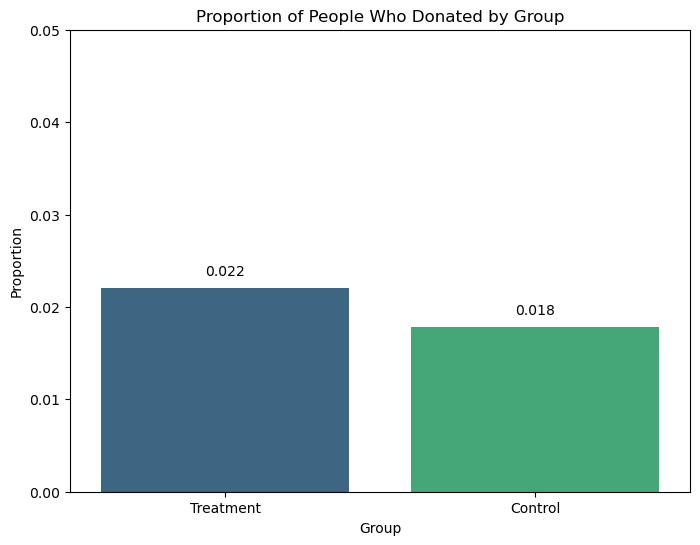

In [23]:
# Calculate the proportion of people who donated in each group
treatment_proportion = df[df['treatment'] == 1]['gave'].mean()
control_proportion = df[df['control'] == 1]['gave'].mean()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['Treatment', 'Control'], y=[treatment_proportion, control_proportion], palette='viridis')

for i, proportion in enumerate([treatment_proportion, control_proportion]):
    plt.text(i, proportion + 0.001, f'{proportion:.3f}', ha='center', va='bottom', fontsize=10)

plt.title('Proportion of People Who Donated by Group')
plt.ylabel('Proportion')
plt.xlabel('Group')
plt.ylim(0, 0.05)
plt.show()

In [24]:
# Perform a bivariate linear regression
X = df['treatment']  # Independent variable
y = df['gave']       # Dependent variable (binary outcome)

X = sm.add_constant(X)  # Add a constant for the regression
model = sm.OLS(y, X, missing='drop').fit()

# Print the regression summary
print(model.summary())

# Extract the p-value and coefficient for interpretation
p_value = model.pvalues['treatment']
coef = model.params['treatment']

# Interpretation
if p_value < 0.05:
    print(f"The treatment effect is statistically significant (p-value: {p_value:.4f}).")
    print(f"The coefficient for treatment is {coef:.4f}, indicating that being in the treatment group increases the likelihood of making a charitable donation by {coef * 100:.2f} percentage points.")
else:
    print(f"The treatment effect is not statistically significant (p-value: {p_value:.4f}).")
    print("There is no evidence to suggest that being in the treatment group affects the likelihood of making a charitable donation.")

                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.618
Date:                Mon, 21 Apr 2025   Prob (F-statistic):            0.00193
Time:                        19:24:39   Log-Likelihood:                 26630.
No. Observations:               50083   AIC:                        -5.326e+04
Df Residuals:                   50081   BIC:                        -5.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0179      0.001     16.225      0.0

In [25]:
results_bl = pd.DataFrame({
    "Variable": model.params.index,
    "Coefficient": model.params.values,
    "Standard Error": model.bse.values,
    "t-Statistic": model.tvalues.values,
    "p-Value": model.pvalues.values,
    "CI Lower (95%)": model.conf_int()[0].values,
    "CI Upper (95%)": model.conf_int()[1].values
})

In [26]:
print(results_bl.to_markdown(index=False))
markdown_table = results_bl.to_markdown(index=False)

# Read the original .qmd content
with open("index.qmd", "r") as f:
    qmd_text = f.read()

# Replace the placeholder with the table
qmd_text = qmd_text.replace("<!-- INSERT_RESULTSb1_HERE -->", markdown_table)

# Write back the updated file
with open("index.qmd", "w") as f:
    f.write(qmd_text)


| Variable   |   Coefficient |   Standard Error |   t-Statistic |     p-Value |   CI Lower (95%) |   CI Upper (95%) |
|:-----------|--------------:|-----------------:|--------------:|------------:|-----------------:|-----------------:|
| const      |    0.0178582  |       0.00110068 |      16.2246  | 4.77903e-59 |       0.0157009  |       0.0200156  |
| treatment  |    0.00418035 |       0.00134791 |       3.10136 | 0.0019274   |       0.00153844 |       0.00682227 |


#### Probit regression where the outcome variable is whether any charitable donation was made and the explanatory variable is assignment to treatment or control


In [27]:
import statsmodels.api as sm

X = df['treatment']  # Independent variable
y = df['gave']       # Dependent variable (binary outcome)

X = sm.add_constant(X)

probit_model = sm.Probit(y, X, missing='drop').fit()

print(probit_model.summary())

p_value_probit = probit_model.pvalues['treatment']
coef_probit = probit_model.params['treatment']

# Interpretation
if p_value_probit < 0.05:
    print(f"The treatment effect is statistically significant (p-value: {p_value_probit:.4f}).")
    print(f"The coefficient for treatment is {coef_probit:.4f}, indicating that being in the treatment group has a significant effect on the likelihood of making a charitable donation.")
else:
    print(f"The treatment effect is not statistically significant (p-value: {p_value_probit:.4f}).")
    print("There is no evidence to suggest that being in the treatment group affects the likelihood of making a charitable donation.")

Optimization terminated successfully.
         Current function value: 0.100443
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   gave   No. Observations:                50083
Model:                         Probit   Df Residuals:                    50081
Method:                           MLE   Df Model:                            1
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:               0.0009783
Time:                        19:24:40   Log-Likelihood:                -5030.5
converged:                       True   LL-Null:                       -5035.4
Covariance Type:            nonrobust   LLR p-value:                  0.001696
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1001      0.023    -90.073      0.000      -2.146      -2.054
treatment      0.0868      0.

In [28]:
results_pr = pd.DataFrame({
    "Variable": model.params.index,
    "Coefficient": model.params.values,
    "Standard Error": model.bse.values,
    "t-Statistic": model.tvalues.values,
    "p-Value": model.pvalues.values,
    "CI Lower (95%)": model.conf_int()[0].values,
    "CI Upper (95%)": model.conf_int()[1].values
})

In [29]:
print(results_pr.to_markdown(index=False))
markdown_table = results_pr.to_markdown(index=False)

# Read the original .qmd content
with open("index.qmd", "r") as f:
    qmd_text = f.read()

# Replace the placeholder with the table
qmd_text = qmd_text.replace("<!-- INSERT_RESULTSpr_HERE -->", markdown_table)

# Write back the updated file
with open("index.qmd", "w") as f:
    f.write(qmd_text)


| Variable   |   Coefficient |   Standard Error |   t-Statistic |     p-Value |   CI Lower (95%) |   CI Upper (95%) |
|:-----------|--------------:|-----------------:|--------------:|------------:|-----------------:|-----------------:|
| const      |    0.0178582  |       0.00110068 |      16.2246  | 4.77903e-59 |       0.0157009  |       0.0200156  |
| treatment  |    0.00418035 |       0.00134791 |       3.10136 | 0.0019274   |       0.00153844 |       0.00682227 |


### Differences between Match Rates


In [30]:
print("Unique values in 'ratio':", df['ratio'].unique())
print("Unique values in 'ratio2':", df['ratio2'].unique())
print("Unique values in 'ratio3':", df['ratio3'].unique())

Unique values in 'ratio': ['Control', 1, 2, 3]
Categories (4, object): ['Control' < 1 < 2 < 3]
Unique values in 'ratio2': [0, 1]
Categories (2, int8): [0, 1]
Unique values in 'ratio3': [0, 1]
Categories (2, int8): [0, 1]


In [31]:
from scipy.stats import ttest_ind

# Create group masks
is_1to1 = (df['treatment'] == 1) & (df['ratio2'] == 0) & (df['ratio3'] == 0)
is_2to1 = df['ratio2'] == 1
is_3to1 = df['ratio3'] == 1

# Get gave outcomes for each group
gave_1to1 = df[is_1to1]['gave'].dropna()
gave_2to1 = df[is_2to1]['gave'].dropna()
gave_3to1 = df[is_3to1]['gave'].dropna()

# Run t-tests
t_stat_21, p_val_21 = ttest_ind(gave_2to1, gave_1to1, equal_var=False)
t_stat_31, p_val_31 = ttest_ind(gave_3to1, gave_1to1, equal_var=False)
t_stat_32, p_val_32 = ttest_ind(gave_3to1, gave_2to1, equal_var=False)

# Print results
print(f"2:1 vs 1:1 → t = {t_stat_21:.4f}, p = {p_val_21:.4f}")
print(f"3:1 vs 1:1 → t = {t_stat_31:.4f}, p = {p_val_31:.4f}")
print(f"3:1 vs 2:1 → t = {t_stat_32:.4f}, p = {p_val_32:.4f}")


2:1 vs 1:1 → t = 0.9650, p = 0.3345
3:1 vs 1:1 → t = 1.0150, p = 0.3101
3:1 vs 2:1 → t = 0.0501, p = 0.9600


In [32]:
from scipy.stats import t

alpha = 0.05  # for 95% confidence
results = []

# Group definitions
is_1to1 = (df['treatment'] == 1) & (df['ratio2'] == 0) & (df['ratio3'] == 0)
is_2to1 = df['ratio2'] == 1
is_3to1 = df['ratio3'] == 1

# Pairings: label, group1, group2
pairings = [
    ("2:1 vs 1:1", df[is_2to1]['gave'].dropna(), df[is_1to1]['gave'].dropna()),
    ("3:1 vs 1:1", df[is_3to1]['gave'].dropna(), df[is_1to1]['gave'].dropna()),
    ("3:1 vs 2:1", df[is_3to1]['gave'].dropna(), df[is_2to1]['gave'].dropna())
]

for label, group1, group2 in pairings:
    mean1 = group1.mean()
    mean2 = group2.mean()
    mean_diff = mean1 - mean2
    var1 = group1.var(ddof=1)
    var2 = group2.var(ddof=1)
    n1 = len(group1)
    n2 = len(group2)

    pooled_se = ((var1 / n1) + (var2 / n2)) ** 0.5
    manual_t_stat = mean_diff / pooled_se
    df_degrees = n1 + n2 - 2
    critical_value = t.ppf(1 - alpha/2, df_degrees)
    conclusion = "Significant" if abs(manual_t_stat) > critical_value else "Not Significant"

    results.append({
        "Comparison": label,
        "Group 1 Mean Donation Rate": round(mean1 * 100, 2),  # Convert to %
        "Group 2 Mean Donation Rate": round(mean2 * 100, 2),
        "Mean Diff (pp)": round(mean_diff * 100, 2),
        "T-Statistic": round(manual_t_stat, 4),
        "Critical Value (±)": round(critical_value, 4),
        "Conclusion": conclusion
    })

# Display results
import pandas as pd
results1_df = pd.DataFrame(results)
print(results1_df.to_markdown(index=False))


| Comparison   |   Group 1 Mean Donation Rate |   Group 2 Mean Donation Rate |   Mean Diff (pp) |   T-Statistic |   Critical Value (±) | Conclusion      |
|:-------------|-----------------------------:|-----------------------------:|-----------------:|--------------:|---------------------:|:----------------|
| 2:1 vs 1:1   |                         2.26 |                         2.07 |             0.19 |        0.965  |               1.9601 | Not Significant |
| 3:1 vs 1:1   |                         2.27 |                         2.07 |             0.2  |        1.015  |               1.9601 | Not Significant |
| 3:1 vs 2:1   |                         2.27 |                         2.26 |             0.01 |        0.0501 |               1.9601 | Not Significant |


In [33]:
# Generate markdown table
markdown_table = results1_df.to_markdown(index=False)

# Read the original .qmd content
with open("index.qmd", "r") as f:
    qmd_text = f.read()

# Replace the placeholder with the table
qmd_text = qmd_text.replace("<!-- INSERT_RESULTS1_HERE -->", markdown_table)

# Write back the updated file
with open("index.qmd", "w") as f:
    f.write(qmd_text)


#### Assess the same issue using a regression. Specifically, create the variable `ratio1` then regress `gave` on `ratio1`, `ratio2`, and `ratio3` (or alternatively, regress `gave` on the categorical variable `ratio`). Interpret the coefficients and their statistical precision

In [34]:
# Create the ratio1 variable
df['ratio1'] = ((df['ratio2'] == 0) & (df['ratio3'] == 0)).astype(int)

X = df[['ratio1', 'ratio2', 'ratio3']]  # Independent variables
y = df['gave']  # Dependent variable

X = sm.add_constant(X)  # Add a constant term for the regression
model = sm.OLS(y, X, missing='drop').fit()

print(model.summary())

coefficients = model.params
p_values = model.pvalues

for var in ['ratio1', 'ratio2', 'ratio3']:
    if p_values[var] < 0.05:
        print(f"The coefficient for {var} is {coefficients[var]:.4f}, which is statistically significant (p-value: {p_values[var]:.4f}).")
    else:
        print(f"The coefficient for {var} is {coefficients[var]:.4f}, which is not statistically significant (p-value: {p_values[var]:.4f}).")

                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.743
Date:                Mon, 21 Apr 2025   Prob (F-statistic):             0.0415
Time:                        19:24:41   Log-Likelihood:                 26629.
No. Observations:               50083   AIC:                        -5.325e+04
Df Residuals:                   50079   BIC:                        -5.321e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.229e+10   1.54e+11      0.080      0.9

In [35]:
#The results show clear signs of a severe multicollinearity or design matrix error, likely caused by including all three dummy variables (ratio1, ratio2, ratio3) without dropping a reference group. Since the three dummies are mutually exclusive and exhaustive (they sum to 1), including all of them with a constant creates a perfect linear dependency, which leads to a singular matrix and unreliable coefficient estimates. 
# To fix this, I omit one of the ratio dummies (e.g., drop ratio1) so that the remaining coefficients (ratio2 and ratio3) are interpreted relative to the 1:1 match group. 

import statsmodels.api as sm

# Make sure 'gave' is numeric
y = df['gave'].astype(float)

# Only include ratio2 and ratio3 — 1:1 (ratio1) is the reference group
X = df[['ratio2', 'ratio3']]

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X, missing='drop').fit()

# Print summary
print(model.summary())

# Interpret the coefficients
coefficients = model.params
p_values = model.pvalues

for var in ['ratio2', 'ratio3']:
    if p_values[var] < 0.05:
        print(f"The coefficient for {var} is {coefficients[var]:.4f}, which is statistically significant (p-value: {p_values[var]:.4f}).")
    else:
        print(f"The coefficient for {var} is {coefficients[var]:.4f}, which is not statistically significant (p-value: {p_values[var]:.4f}).")


                            OLS Regression Results                            
Dep. Variable:                   gave   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.117
Date:                Mon, 21 Apr 2025   Prob (F-statistic):             0.0163
Time:                        19:24:41   Log-Likelihood:                 26629.
No. Observations:               50083   AIC:                        -5.325e+04
Df Residuals:                   50080   BIC:                        -5.323e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.001     22.306      0.0

In [36]:
results_r = pd.DataFrame({
    "Variable": model.params.index,
    "Coefficient": model.params.values,
    "Standard Error": model.bse.values,
    "t-Statistic": model.tvalues.values,
    "p-Value": model.pvalues.values,
    "CI Lower (95%)": model.conf_int()[0].values,
    "CI Upper (95%)": model.conf_int()[1].values
})

In [37]:
print(results_r.to_markdown(index=False))
markdown_table = results_r.to_markdown(index=False)

# Read the original .qmd content
with open("index.qmd", "r") as f:
    qmd_text = f.read()

# Replace the placeholder with the table
qmd_text = qmd_text.replace("<!-- INSERT_RESULTSr_HERE -->", markdown_table)

# Write back the updated file
with open("index.qmd", "w") as f:
    f.write(qmd_text)


| Variable   |   Coefficient |   Standard Error |   t-Statistic |      p-Value |   CI Lower (95%) |   CI Upper (95%) |
|:-----------|--------------:|-----------------:|--------------:|-------------:|-----------------:|-----------------:|
| const      |    0.0190151  |      0.000852479 |      22.3056  | 1.11719e-109 |      0.0173442   |       0.020686   |
| ratio2     |    0.00361828 |      0.00159454  |       2.26917 | 0.023262     |      0.000492971 |       0.00674359 |
| ratio3     |    0.0037183  |      0.00159479  |       2.33153 | 0.0197294    |      0.000592493 |       0.00684411 |


####  Calculate the response rate difference between the 1:1 and 2:1 match ratios and the 2:1 and 3:1 ratios.  Do this directly from the data, and do it by computing the differences in the fitted coefficients of the previous regression. what do you conclude regarding the effectiveness of different sizes of matched donations?

In [38]:
# Identify match groups
is_1to1 = (df['treatment'] == 1) & (df['ratio2'] == 0) & (df['ratio3'] == 0)
is_2to1 = df['ratio2'] == 1
is_3to1 = df['ratio3'] == 1

# donation rates
rate_1to1 = df[is_1to1]['gave'].mean()
rate_2to1 = df[is_2to1]['gave'].mean()
rate_3to1 = df[is_3to1]['gave'].mean()

diff_21_vs_11 = rate_2to1 - rate_1to1
diff_31_vs_21 = rate_3to1 - rate_2to1

print(f"2:1 vs 1:1 response rate difference: {diff_21_vs_11:.4f}")
print(f"3:1 vs 2:1 response rate difference: {diff_31_vs_21:.4f}")

# difference from coefficients from the regression
coef_2to1 = coefficients['ratio2']
coef_3to1 = coefficients['ratio3']

diff_coef_1to1_2to1 = coef_2to1  # Coefficient for ratio2 represents the difference from 1:1
diff_coef_2to1_3to1 = coef_3to1 - coef_2to1  # Difference between coefficients for ratio3 and ratio2

print(f"Response rate difference from coefficients (2:1 - 1:1): {diff_coef_1to1_2to1:.4f}")
print(f"Response rate difference from coefficients (3:1 - 2:1): {diff_coef_2to1_3to1:.4f}")


2:1 vs 1:1 response rate difference: 0.0019
3:1 vs 2:1 response rate difference: 0.0001
Response rate difference from coefficients (2:1 - 1:1): 0.0036
Response rate difference from coefficients (3:1 - 2:1): 0.0001


### Size of Charitable Contribution


#### Calculate a t-test of the donation amount on the treatment status

Including donation values where gave = 0 i.e. donation = 0

In [39]:
from scipy.stats import t

# Select donation amount by group
treatment_group_amount = df[df['treatment'] == 1]['amount'].dropna()
control_group_amount = df[df['treatment'] == 0]['amount'].dropna()

# Basic stats
mean_diff = treatment_group_amount.mean() - control_group_amount.mean()
var_treatment = treatment_group_amount.var(ddof=1)
var_control = control_group_amount.var(ddof=1)
n_treatment = len(treatment_group_amount)
n_control = len(control_group_amount)

# Pooled standard error
pooled_se = ((var_treatment / n_treatment) + (var_control / n_control)) ** 0.5

# Manual t-statistic
manual_t_stat = mean_diff / pooled_se
print(f"Manual T-statistic: {manual_t_stat:.4f}")

# Degrees of freedom (for equal variance t-test)
df_degrees = n_treatment + n_control - 2

# Critical t value for 95% confidence (two-tailed)
critical_value = t.ppf(1 - 0.025, df_degrees)
print(f"Critical value (±): {critical_value:.4f}")

# Conclusion
if abs(manual_t_stat) > critical_value:
    print("Result: Statistically significant difference in donation amount.")
else:
    print("Result: No statistically significant difference in donation amount.")


Manual T-statistic: 1.9182
Critical value (±): 1.9600
Result: No statistically significant difference in donation amount.


In [40]:
from scipy.stats import ttest_ind

# Extract donation amounts for treatment and control groups
treatment_donations = df[df['treatment'] == 1]['amount'].dropna()
control_donations = df[df['control'] == 1]['amount'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(treatment_donations, control_donations, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

mean_treatment = treatment_donations.mean()
mean_control = control_donations.mean()
print(f"Mean donation (treatment group): ${mean_treatment:.2f}")
print(f"Mean donation (control group):   ${mean_control:.2f}")

# Check significance at 95% confidence level
if p_value < 0.05:
    print("The difference in donation amounts between treatment and control groups is statistically significant.")
else:
    print("The difference in donation amounts between treatment and control groups is not statistically significant.")

T-statistic: 1.9183
P-value: 0.0551
Mean donation (treatment group): $0.97
Mean donation (control group):   $0.81
The difference in donation amounts between treatment and control groups is not statistically significant.


Only including donation values where gave = 1 i.e. donation > 0

In [41]:
from scipy.stats import ttest_ind

# Extract donation amounts for treatment and control groups
treatment_donations = df[(df['treatment'] == 1) & (df['gave'] == 1)]['amount'].dropna()
control_donations = df[(df['control'] == 1) & (df['gave'] == 1)]['amount'].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(treatment_donations, control_donations, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

mean_treatment = treatment_donations.mean()
mean_control = control_donations.mean()
print(f"Mean donation (treatment group): ${mean_treatment:.2f}")
print(f"Mean donation (control group):   ${mean_control:.2f}")

# Check significance at 95% confidence level
if p_value < 0.05:
    print("The difference in donation amounts between treatment and control groups is statistically significant.")
else:
    print("The difference in donation amounts between treatment and control groups is not statistically significant.")

T-statistic: -0.5846
P-value: 0.5590
Mean donation (treatment group): $43.87
Mean donation (control group):   $45.54
The difference in donation amounts between treatment and control groups is not statistically significant.


In [42]:
#using bivariate regression 

donors = df[df['gave'] == 1].copy()

y = donors['amount'].astype(float)
X = sm.add_constant(donors['treatment'])  # Treatment: 1 = treatment group, 0 = control

model = sm.OLS(y, X).fit()

print(model.summary())

coef = model.params['treatment']
p_val = model.pvalues['treatment']
mean_treat = donors[donors['treatment'] == 1]['amount'].mean()
mean_control = donors[donors['treatment'] == 0]['amount'].mean()

print(f"Mean donation (treatment group): ${mean_treat:.2f}")
print(f"Mean donation (control group):   ${mean_control:.2f}")
print(f"Coefficient (treatment): {coef:.4f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("The treatment has a statistically significant effect on donation amount (among donors).")
else:
    print("There is no statistically significant difference in donation amount between treatment and control groups (among donors).")




                            OLS Regression Results                            
Dep. Variable:                 amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3374
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.561
Time:                        19:24:41   Log-Likelihood:                -5326.8
No. Observations:                1034   AIC:                         1.066e+04
Df Residuals:                    1032   BIC:                         1.067e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5403      2.423     18.792      0.0

In [43]:
results_d = pd.DataFrame({
    "Variable": model.params.index,
    "Coefficient": model.params.values,
    "Standard Error": model.bse.values,
    "t-Statistic": model.tvalues.values,
    "p-Value": model.pvalues.values,
    "CI Lower (95%)": model.conf_int()[0].values,
    "CI Upper (95%)": model.conf_int()[1].values
})

In [44]:
print(results_d.to_markdown(index=False))
markdown_table = results_d.to_markdown(index=False)

# Read the original .qmd content
with open("index.qmd", "r") as f:
    qmd_text = f.read()

# Replace the placeholder with the table
qmd_text = qmd_text.replace("<!-- INSERT_RESULTSd_HERE -->", markdown_table)

# Write back the updated file
with open("index.qmd", "w") as f:
    f.write(qmd_text)


| Variable   |   Coefficient |   Standard Error |   t-Statistic |     p-Value |   CI Lower (95%) |   CI Upper (95%) |
|:-----------|--------------:|-----------------:|--------------:|------------:|-----------------:|-----------------:|
| const      |      45.5403  |          2.42338 |     18.7921   | 5.47358e-68 |         40.785   |         50.2956  |
| treatment  |      -1.66839 |          2.87238 |     -0.580839 | 0.561476    |         -7.30477 |          3.96799 |


In [45]:
# Check if control = 1 for all rows where treatment = 0
all_control_correct = (df[df['treatment'] == 0]['control'] == 1).all()

if all_control_correct:
    print("For all rows where treatment = 0, control = 1.")
else:
    print("There are rows where treatment = 0 but control is not 1.")

For all rows where treatment = 0, control = 1.


In [46]:
# Check if treatment = 1 for all rows where control = 0
all_control_correct = (df[df['control'] == 0]['treatment'] == 1).all()

if all_control_correct:
    print("For all rows where c = 0, t = 1.")
else:
    print("There are rows where c = 0 but t is not 1.")

For all rows where c = 0, t = 1.


#### Make two plots: one for the treatment group and one for the control. Each plot should be a histogram of the donation amounts only among people who donated. Add a red vertical bar or some other annotation to indicate the sample average for each plot

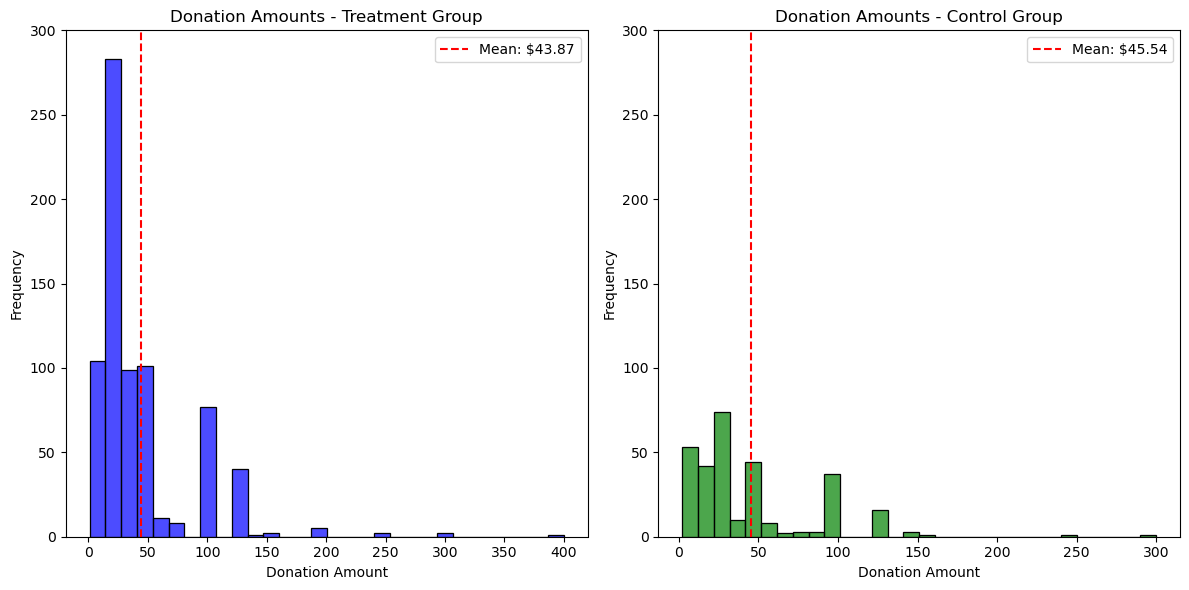

In [47]:
# Filter donation amounts for treatment and control groups where donations were made (gave = 1)
treatment_donations = df[(df['treatment'] == 1) & (df['gave'] == 1)]['amount']
control_donations = df[(df['control'] == 1) & (df['gave'] == 1)]['amount']

# Calculate means for annotation
mean_treatment = treatment_donations.mean()
mean_control = control_donations.mean()

# Plot for treatment group
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(treatment_donations, bins=30, kde=False, color='blue', alpha=0.7)
plt.axvline(mean_treatment, color='red', linestyle='--', label=f'Mean: ${mean_treatment:.2f}')
plt.title('Donation Amounts - Treatment Group')
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.ylim(0, 300)  # Set y-axis scale
plt.legend()

# Plot for control group
plt.subplot(1, 2, 2)
sns.histplot(control_donations, bins=30, kde=False, color='green', alpha=0.7)
plt.axvline(mean_control, color='red', linestyle='--', label=f'Mean: ${mean_control:.2f}')
plt.title('Donation Amounts - Control Group')
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.ylim(0, 300)  # Set y-axis scale
plt.legend()

plt.tight_layout()
plt.show()

### Simulation Experiment

1. Suppose the true distribution of respondents who do not get a charitable donation match is Bernoulli with probability p=0.018 that a donation is made. 
2. Further suppose that the true distribution of respondents who do get a charitable donation match of any size is Bernoulli with probability p=0.022 that a donation is made. 



#### Law of Large Numbers

Simulating 10,000 draws from the control distribution and 10,000 draws from the treatment distribution. 
I then calculate a vector of 10,000 differences, and then plot the cumulative average of that vector of differences. 

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# True probabilities
p_control = 0.018 #do not get any charitable match
p_treatment = 0.022 #get a charitable match of any size

n = 10000

# Simulate 10,000 Bernoulli draws from each group
control = np.random.binomial(1, p_control, n)
treatment = np.random.binomial(1, p_treatment, n)

# Compute differences between each draw (pairwise)
differences = treatment - control  # each element is 0, +1, or -1

# Cumulative average of the differences
cumulative_avg_diff = np.cumsum(differences) / np.arange(1, n + 1)



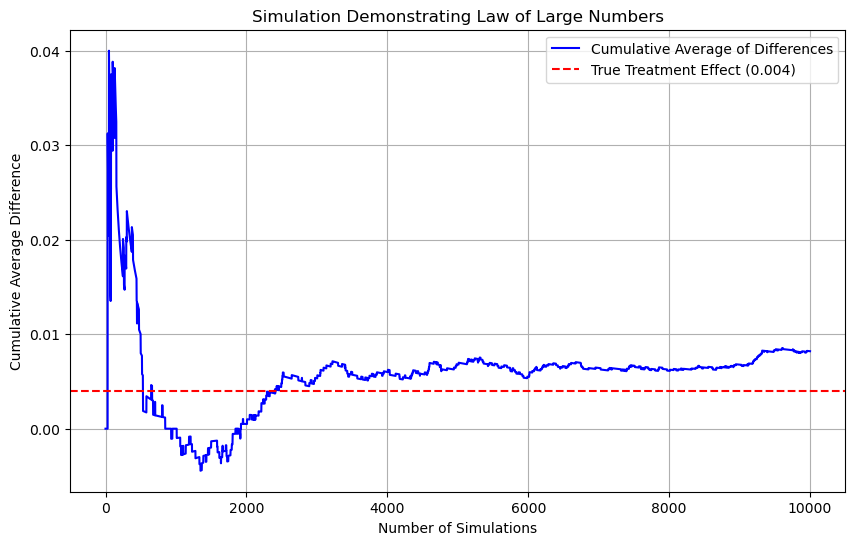

In [49]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_avg_diff, label="Cumulative Average of Differences", color='blue')
plt.axhline(0.004, color='red', linestyle='--', label="True Treatment Effect (0.004)")
plt.xlabel("Number of Simulations")
plt.ylabel("Cumulative Average Difference")
plt.title("Simulation Demonstrating Law of Large Numbers")
plt.legend()
plt.grid(True)
plt.show()

This average is "noisey" when only averaging a few numbers, but "settles down" and approximate the treatment effect (0.004 = 0.022 - 0.018) as the sample size gets large. But in this run, it converges slightly above the true treatment effect. Let's try another run. 



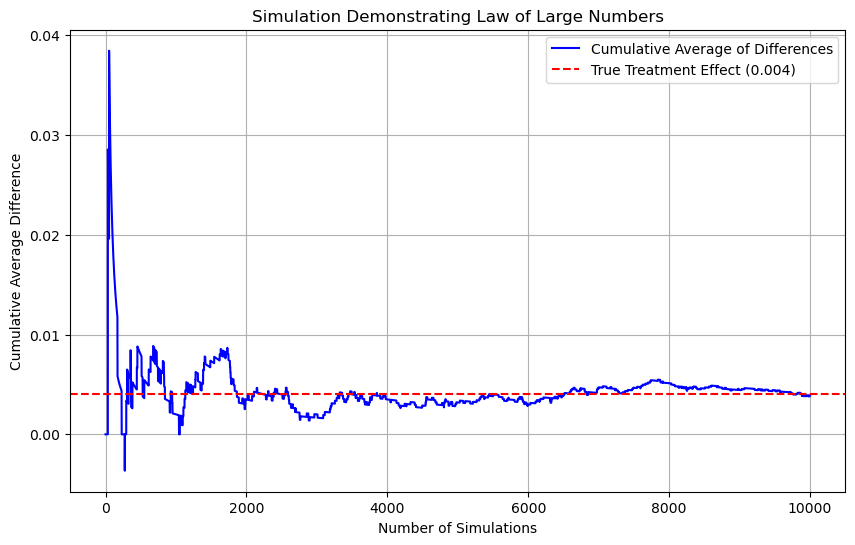

In [50]:


# True probabilities
p_control = 0.018 #do not get any charitable match
p_treatment = 0.022 #get a charitable match of any size

n = 10000

# Simulate 10,000 Bernoulli draws from each group
control = np.random.binomial(1, p_control, n)
treatment = np.random.binomial(1, p_treatment, n)

# Compute differences between each draw (pairwise)
differences = treatment - control  # each element is 0, +1, or -1

# Cumulative average of the differences
cumulative_avg_diff = np.cumsum(differences) / np.arange(1, n + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(cumulative_avg_diff, label="Cumulative Average of Differences", color='blue')
plt.axhline(0.004, color='red', linestyle='--', label="True Treatment Effect (0.004)")
plt.xlabel("Number of Simulations")
plt.ylabel("Cumulative Average Difference")
plt.title("Simulation Demonstrating Law of Large Numbers")
plt.legend()
plt.grid(True)
plt.show()



### Central Limit Theorem

I make 4 histograms at sample sizes 50, 200, 500, and 1000.  

To do this for a sample size of e.g. 50, I take 50 draws from each of the control and treatment distributions, and calculate the average difference between those draws. 

Then, I repeat that process 999 more times so that I have 1000 averages. Lastly, I plot the histogram of those averages, repeating for the other 3 histograms. 

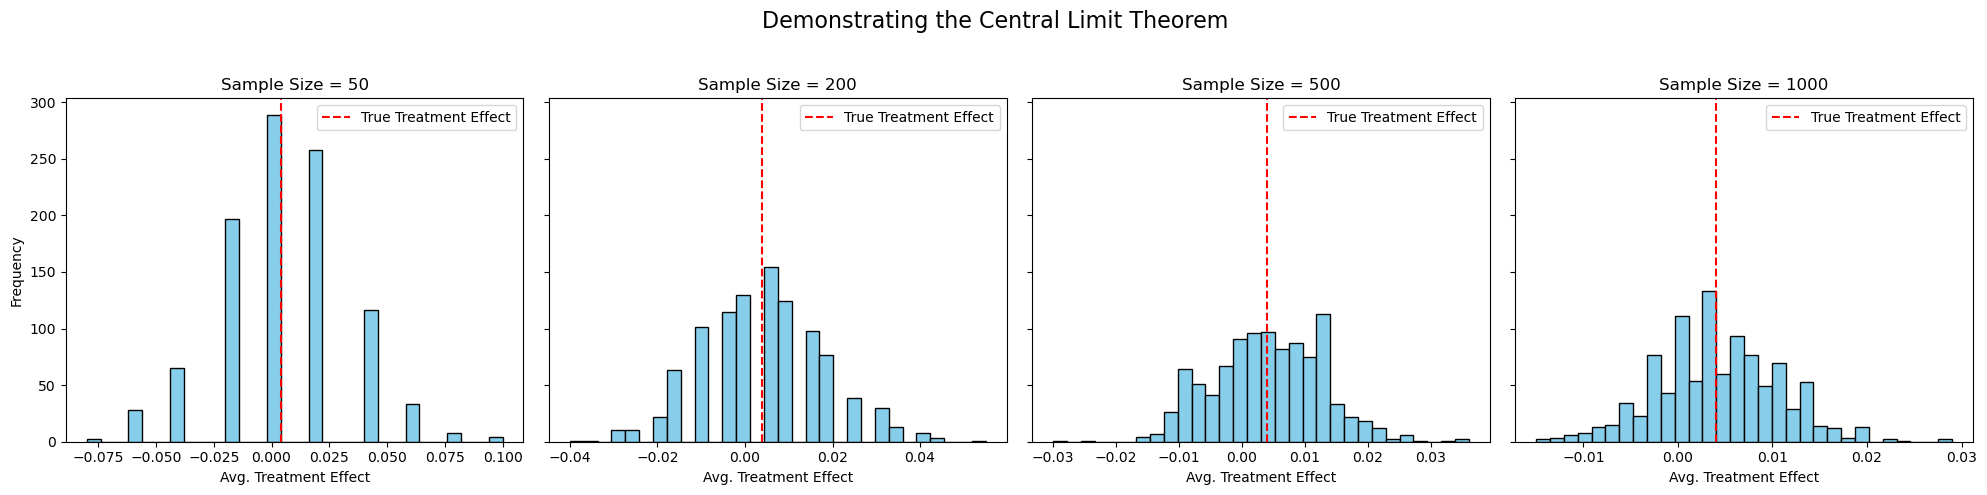

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Parameters
p_control = 0.018
p_treatment = 0.022
sample_sizes = [50, 200, 500, 1000]
num_simulations = 1000

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, n in enumerate(sample_sizes):
    mean_diffs = []
    
    for _ in range(num_simulations):
        control_sample = np.random.binomial(1, p_control, n)
        treatment_sample = np.random.binomial(1, p_treatment, n)
        diff = treatment_sample.mean() - control_sample.mean()
        mean_diffs.append(diff)
    
    # Plot histogram
    axs[i].hist(mean_diffs, bins=30, color='skyblue', edgecolor='black')
    axs[i].axvline(0.004, color='red', linestyle='--', label='True Treatment Effect')
    axs[i].set_title(f"Sample Size = {n}")
    axs[i].set_xlabel("Avg. Treatment Effect")
    axs[i].legend()

axs[0].set_ylabel("Frequency")
plt.suptitle("Demonstrating the Central Limit Theorem", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
